In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

def cutWeek(weekNumber, data):
    weekdata = []
    for i in range(weekNumber):
         temp = data[data.Week_Number == i]
         temp = temp.reset_index(drop=True)
         weekdata.append(temp)
    return weekdata

def labelMapping(year, week, label):
    labelMap = {}
    for (y, w, l) in zip(year, week, label):
        key = (y, w)
        value = l
        labelMap[key] = value
    return labelMap

def proficCalculator(data, fund):
    # Week 0 case
    week1Data = data[0]
    week1Label = week1Data.Label[0] # week 0 label

    if week1Label == 1:
        stock = True
        buyPrice = week1Data.Close[0] # week 0 first day price
        sellPrice = week1Data.Close[len(week1Data)-1] # week 0 last day price
    else:
        stock = False
        buyPrice = week1Data.Close[len(week1Data)-1] # week 0 last day price
        sellPrice = week1Data.Close[len(week1Data)-1] # week 0 last day price


    for df in data[1:]:
        nextWeekColor = df.Label[0]
        nextClosePrice = df.Close[len(df)-1]

        # stock + green = no action
        if (stock == True) and (nextWeekColor == 1):
            stock == True # Keep holding the stock
            buyPrice = buyPrice # Buy point stay
            sellPrice = nextClosePrice # Sell point move forward

        # stock + red = sell
        elif (stock == True) and (nextWeekColor == 0):
            r = 1 + (sellPrice - buyPrice) / sellPrice
            fund = fund * r
            buyPrice = nextClosePrice
            sellPrice = nextClosePrice
            stock = False
            
        # money + green = buy stock
        elif (stock == False) and (nextWeekColor == 1):
            buyPrice = buyPrice
            sellPrice = nextClosePrice
            stock = True
        # money + red = no action
        elif (stock == False) and (nextWeekColor == 0):
            buyPrice = nextClosePrice
            sellPrice = nextClosePrice
            stock = False

    # Last withdraw
    r = 1 + (sellPrice - buyPrice) / sellPrice
    fund = fund * r
    return fund

In [2]:
dfDetail = pd.read_csv('./GOOGL_weekly_return_volatility_detailed.csv')
df2019 = dfDetail[dfDetail.Year == 2019]
df2020 = dfDetail[dfDetail.Year == 2020]

dfLabel = pd.read_csv('./GOOGL_weekly_return_volatility.csv')
year1 = dfLabel[dfLabel.Year == 2019]
year2 = dfLabel[dfLabel.Year == 2020]


# Create label

In [3]:
# Extract each week close price
# the closing price of last trading day of a week
goo2019Week = cutWeek(53, df2019)
goo2020Week = cutWeek(53, df2020)

weekClose2019 = []
for df in goo2019Week:
    temp = df.Close
    temp = temp[len(temp)-1]
    weekClose2019.append(temp)

weekClose2020 = []
for df in goo2020Week:
    temp = df.Close
    temp = temp[len(temp)-1]
    weekClose2020.append(temp)

weekClose = weekClose2019 + weekClose2020

In [4]:
weekClose = weekClose2019 
ytest = year1.label

# linear
wList = [5,6,7,8,9,10,11,12]
degree = 1
accuracy1 = []

for w in wList:

    yPredict = []

    for i in range(w):
        yPredict.append(0) # in first w week we don't trade, wait for the price coming out

    fromIndex = 0
    toIndex = -1 + w
    
    # predict each w group
    while toIndex < len(weekClose)-1:
        yTrain = weekClose[fromIndex : fromIndex+5]
        xTrain = [1,2,3,4,5]
        xTest = 6


        weights = np.polyfit(xTrain, yTrain, degree)
        model = np.poly1d(weights)
        pww = model(xTest)
        
        pw = yTrain[-1]
        
        if pww > pw:
            yPredict.append(1)
        elif pww < pw:
            yPredict.append(0)
        else:
            yPredict.append(yPredict[-1])

        fromIndex += 1
        toIndex += 1

    # accuracy for each w
    accuracy1.append(accuracy_score(ytest, yPredict))

# quadratic
wList = [5,6,7,8,9,10,11,12]
degree = 2
accuracy2 = []

for w in wList:

    yPredict = []

    for i in range(w):
        yPredict.append(0) # in first w week we don't trade, wait for the price coming out

    fromIndex = 0
    toIndex = -1 + w
    
    # predict each w group
    while toIndex < len(weekClose)-1:
        yTrain = weekClose[fromIndex : fromIndex+5]
        xTrain = [1,2,3,4,5]
        xTest = 6


        weights = np.polyfit(xTrain, yTrain, degree)
        model = np.poly1d(weights)
        pww = model(xTest)
        
        pw = yTrain[-1]
        
        if pww > pw:
            yPredict.append(1)
        elif pww < pw:
            yPredict.append(0)
        else:
            yPredict.append(yPredict[-1])

        fromIndex += 1
        toIndex += 1

    # accuracy for each w
    accuracy2.append(accuracy_score(ytest, yPredict))
# cubic
wList = [5,6,7,8,9,10,11,12]
degree = 3
accuracy3 = []

for w in wList:

    yPredict = []

    for i in range(w):
        yPredict.append(0) # in first w week we don't trade, wait for the price coming out

    fromIndex = 0
    toIndex = -1 + w
    
    # predict each w group
    while toIndex < len(weekClose)-1:
        yTrain = weekClose[fromIndex : fromIndex+5]
        xTrain = [1,2,3,4,5]
        xTest = 6


        weights = np.polyfit(xTrain, yTrain, degree)
        model = np.poly1d(weights)
        pww = model(xTest)
        
        pw = yTrain[-1]
        
        if pww > pw:
            yPredict.append(1)
        elif pww < pw:
            yPredict.append(0)
        else:
            yPredict.append(yPredict[-1])

        fromIndex += 1
        toIndex += 1

    # accuracy for each w
    accuracy3.append(accuracy_score(ytest, yPredict))



Text(0.5, 0, 'w')

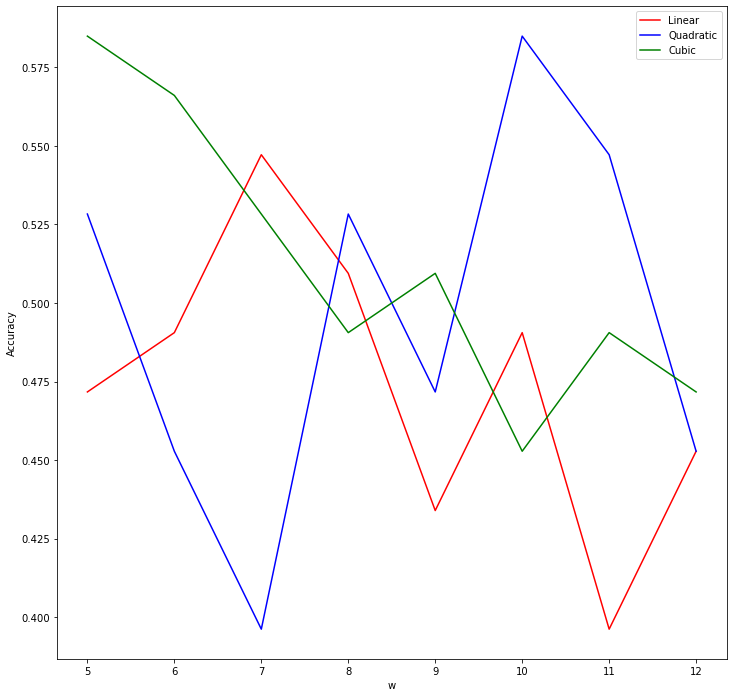

In [5]:
# Plot the outcome
plt.figure(figsize=(12,12))
## linear
x = [5,6,7,8,9,10,11,12]
y = accuracy1
plt.plot(x, y, label='Linear', color='red')

## Quadratic
x = [5,6,7,8,9,10,11,12]
y = accuracy2
plt.plot(x, y, label='Quadratic', color='blue')

## cubic
x = [5,6,7,8,9,10,11,12]
y = accuracy3
plt.plot(x, y, label='Cubic', color='green')

## legend
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('w')

# For each d take the best W
Linear is 7, Quadratic is 10, Cubic is 5

In [6]:
weekClose = weekClose2020
ytest = year2.label

# linear
wList = [7]
degree = 1
accuracy1 = []

for w in wList:

    yPredict = []

    for i in range(w):
        yPredict.append(0) # in first w week we don't trade, wait for the price coming out

    fromIndex = 0
    toIndex = -1 + w
    
    # predict each w group
    while toIndex < len(weekClose)-1:
        yTrain = weekClose[fromIndex : fromIndex+5]
        xTrain = [1,2,3,4,5]
        xTest = 6


        weights = np.polyfit(xTrain, yTrain, degree)
        model = np.poly1d(weights)
        pww = model(xTest)
        
        pw = yTrain[-1]
        
        if pww > pw:
            yPredict.append(1)
        elif pww < pw:
            yPredict.append(0)
        else:
            yPredict.append(yPredict[-1])

        fromIndex += 1
        toIndex += 1

    # accuracy for each w
    accuracy1.append(accuracy_score(ytest, yPredict))
    yp1 = yPredict

# quadratic
wList = [10]
degree = 2
accuracy2 = []

for w in wList:

    yPredict = []

    for i in range(w):
        yPredict.append(0) # in first w week we don't trade, wait for the price coming out

    fromIndex = 0
    toIndex = -1 + w
    
    # predict each w group
    while toIndex < len(weekClose)-1:
        yTrain = weekClose[fromIndex : fromIndex+5]
        xTrain = [1,2,3,4,5]
        xTest = 6


        weights = np.polyfit(xTrain, yTrain, degree)
        model = np.poly1d(weights)
        pww = model(xTest)
        
        pw = yTrain[-1]
        
        if pww > pw:
            yPredict.append(1)
        elif pww < pw:
            yPredict.append(0)
        else:
            yPredict.append(yPredict[-1])

        fromIndex += 1
        toIndex += 1

    # accuracy for each w
    accuracy2.append(accuracy_score(ytest, yPredict))
    yp2 = yPredict
    

# cubic
wList = [5]
degree = 3
accuracy3 = []

for w in wList:

    yPredict = []

    for i in range(w):
        yPredict.append(0) # in first w week we don't trade, wait for the price coming out

    fromIndex = 0
    toIndex = -1 + w
    
    # predict each w group
    while toIndex < len(weekClose)-1:
        yTrain = weekClose[fromIndex : fromIndex+5]
        xTrain = [1,2,3,4,5]
        xTest = 6


        weights = np.polyfit(xTrain, yTrain, degree)
        model = np.poly1d(weights)
        pww = model(xTest)
        
        pw = yTrain[-1]
        
        if pww > pw:
            yPredict.append(1)
        elif pww < pw:
            yPredict.append(0)
        else:
            yPredict.append(yPredict[-1])

        fromIndex += 1
        toIndex += 1

    # accuracy for each w
    accuracy3.append(accuracy_score(ytest, yPredict))
    yp3 = yPredict



In [7]:
# print accuracy
print('Linear is {}, Quadratic is {}, Cubic is {}'.format(accuracy1, accuracy2, accuracy3))


Linear is [0.5094339622641509], Quadratic is [0.5283018867924528], Cubic is [0.5283018867924528]


In [8]:
# Confusion matrix
## linear
print('linear')
temp = confusion_matrix(ytest, yp1)
print(temp)

tn = temp[0][0]
fn = temp[1][0]
tp = temp[1][1]
fp = temp[0][1]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print('TPR = {}, TNR = {}'.format(tpr, tnr))
print()

## Quadratic
print('quadratic')
temp = confusion_matrix(ytest, yp2)
print(temp)

tn = temp[0][0]
fn = temp[1][0]
tp = temp[1][1]
fp = temp[0][1]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print('TPR = {}, TNR = {}'.format(tpr, tnr))
print()

## cubic
print('cubic')
temp = confusion_matrix(ytest, yp3)
print(temp)

tn = temp[0][0]
fn = temp[1][0]
tp = temp[1][1]
fp = temp[0][1]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print('TPR = {}, TNR = {}'.format(tpr, tnr))
print()

linear
[[12 13]
 [13 15]]
TPR = 0.5357142857142857, TNR = 0.48

quadratic
[[14 11]
 [14 14]]
TPR = 0.5, TNR = 0.56

cubic
[[11 14]
 [11 17]]
TPR = 0.6071428571428571, TNR = 0.44



# Implement strategy for each W

In [76]:
# Linear
dfDetail = pd.read_csv('./GOOGL_weekly_return_volatility_detailed.csv')
year2Detail = dfDetail[dfDetail.Year == 2020]
year2Detail = year2Detail.reset_index(drop = True)
yPredict = yp1

## Add label to detail
lMap = labelMapping(year2.Year, year2.Week_Number, yPredict)
temp = []
for (y, w) in zip(year2Detail.Year, year2Detail.Week_Number):
    key = (y, w)
    temp.append(lMap[key]) 
year2Detail['Label'] = temp
year2Detail = year2Detail[['Year', 'Week_Number', 'Close', 'Label']]

## Cut goo2020
goo2020Week = cutWeek(53, year2Detail)




## trading base on Manhattan KNN label
total = proficCalculator(goo2020Week, 100)
print("Using Label: {}".format(total))

## trding BH
firstWeek = goo2020Week[0]
firstClose = firstWeek.Close[0]

lastWeek = goo2020Week[-1]
lastClose = lastWeek.Close[len(lastWeek)-1]

r = 1 + (lastClose - firstClose) / lastClose
total = 100 * r
print("Buy on first day and Sell on last day: {}".format(total))



Using Label: 93.70114163870544
Buy on first day and Sell on last day: 121.17033527942765


In [77]:
# Quadratic
dfDetail = pd.read_csv('./GOOGL_weekly_return_volatility_detailed.csv')
year2Detail = dfDetail[dfDetail.Year == 2020]
year2Detail = year2Detail.reset_index(drop = True)
yPredict = yp2

## Add label to detail
lMap = labelMapping(year2.Year, year2.Week_Number, yPredict)
temp = []
for (y, w) in zip(year2Detail.Year, year2Detail.Week_Number):
    key = (y, w)
    temp.append(lMap[key]) 
year2Detail['Label'] = temp
year2Detail = year2Detail[['Year', 'Week_Number', 'Close', 'Label']]

## Cut goo2020
goo2020Week = cutWeek(53, year2Detail)




## trading base on Manhattan KNN label
total = proficCalculator(goo2020Week, 100)
print("Using Label: {}".format(total))

## trding BH
firstWeek = goo2020Week[0]
firstClose = firstWeek.Close[0]

lastWeek = goo2020Week[-1]
lastClose = lastWeek.Close[len(lastWeek)-1]

r = 1 + (lastClose - firstClose) / lastClose
total = 100 * r
print("Buy on first day and Sell on last day: {}".format(total))



Using Label: 116.55226951422503
Buy on first day and Sell on last day: 121.17033527942765


In [78]:
# Cubic
dfDetail = pd.read_csv('./GOOGL_weekly_return_volatility_detailed.csv')
year2Detail = dfDetail[dfDetail.Year == 2020]
year2Detail = year2Detail.reset_index(drop = True)
yPredict = yp3

## Add label to detail
lMap = labelMapping(year2.Year, year2.Week_Number, yPredict)
temp = []
for (y, w) in zip(year2Detail.Year, year2Detail.Week_Number):
    key = (y, w)
    temp.append(lMap[key]) 
year2Detail['Label'] = temp
year2Detail = year2Detail[['Year', 'Week_Number', 'Close', 'Label']]

## Cut goo2020
goo2020Week = cutWeek(53, year2Detail)




## trading base on Manhattan KNN label
total = proficCalculator(goo2020Week, 100)
print("Using Label: {}".format(total))

## trding BH
firstWeek = goo2020Week[0]
firstClose = firstWeek.Close[0]

lastWeek = goo2020Week[-1]
lastClose = lastWeek.Close[len(lastWeek)-1]

r = 1 + (lastClose - firstClose) / lastClose
total = 100 * r
print("Buy on first day and Sell on last day: {}".format(total))

Using Label: 106.52446171458828
Buy on first day and Sell on last day: 121.17033527942765
